# NLP Homework 1
### Alex Pine
#### September 20, 2016

## Experiment 1: Baseline

The first experiment was to run a baseline experiment without any major changes from the original code (other than ReLU), no dropout, and a 90/10 train/dev split.

### Parameters
BATCH_SIZE=32,
DROPOUT_KEEP_PROB=1.0,
EMBEDDING_DIM=64,
FILTER_SIZES=3,4,5,
L2_REG_LAMBDA=0.0,
NUM_EPOCHS=50,
NUM_FILTERS=64

Train/Dev split: 9596/1066

### Results

Final validation evaluation: loss: 1.43, accuracy: 0.71.

The two charts below show the loss and accuracy, respectively. The green line was evaluated on the training dataset, the blue on the validation dataset. 

After the first few iterations of validation set loss reduction, the model overfits, and loss increases for the remaining iterations. The validation accuracy plateaus at 71%.

It's surprising to see the validation loss continue to grow while the validation accuracy remains nearly constant. However, this situation is possible with the cross-entropy loss, since the logits produced by the model can flucuate without crossing the 0.5 threshold that changes the classification.

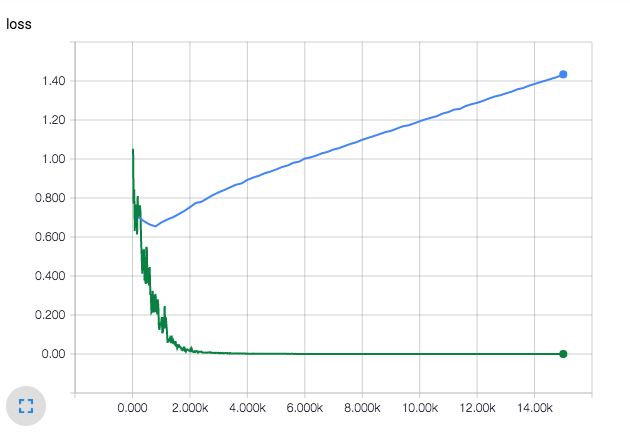

In [2]:
from IPython.display import Image
Image(filename='/Users/pinesol/nlp/hw1/base-loss.png') 

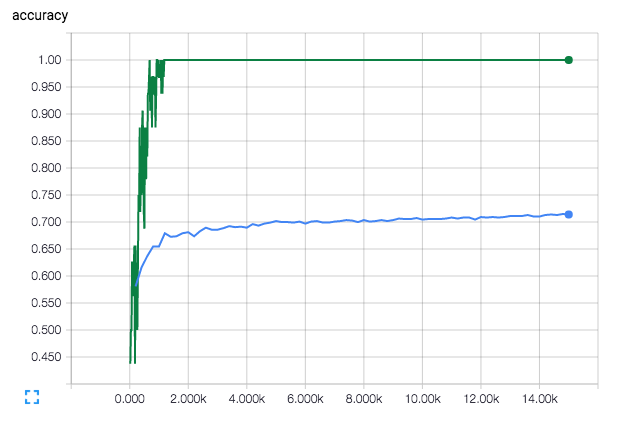

In [3]:
Image(filename='/Users/pinesol/nlp/hw1/base-accuracy.png') 

## Experiment 2: Dropout

The second experiment has exactly the same parameters as the first, except that dropout probability has been set to 0.5.

### Parameters
BATCH_SIZE=32,
DROPOUT_KEEP_PROB=0.5,
EMBEDDING_DIM=64,
FILTER_SIZES=3,4,5,
L2_REG_LAMBDA=0.0,
NUM_EPOCHS=50,
NUM_FILTERS=64

Train/Dev split: 9596/1066

### Results

Final validation evaluation: 

loss: 1.39, accuracy: 0.70.

The addition of dropout seems to not have made any difference, other than reducing the accuracy by 1%. The classifier has still massively overfit.

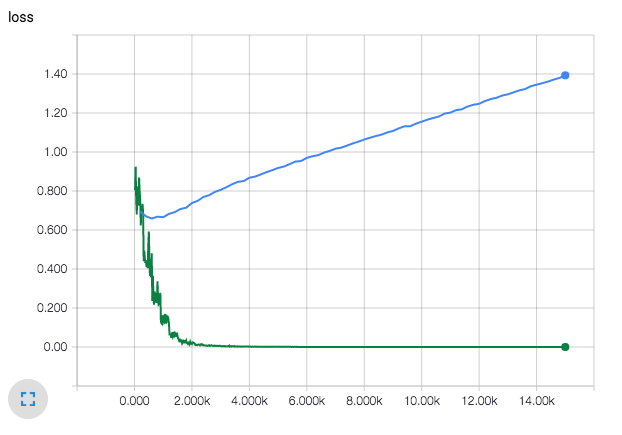

In [4]:
Image(filename='/Users/pinesol/nlp/hw1/dropout-loss.png') 

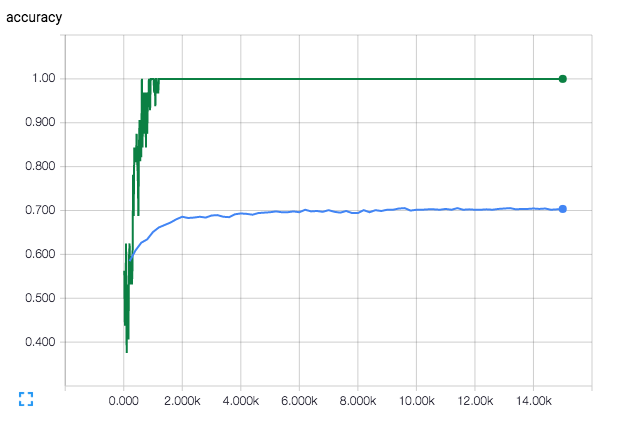

In [5]:
Image(filename='/Users/pinesol/nlp/hw1/dropout-accuracy.png') 

## Experiment 3: An additional convolution layer

In the third experiment, I added a second convolution layer after the first one. More precisely, I added a second convolution+reLU layer after the first convolution+reLU layer, and before the pooling layer. I kept the filter sizes equal to those of the first layer. Unlike the first convolution layer, the second layer kept the number of output filters constant, leaving it at 64.

Since the second convolution layer is input several convolved has access to a larger number of words per sentence compared to the first layer, it may be able to learn more complex features from the language.

### Parameters
This experiment uses the same hyperparameters as the previous experiment, including the dropout probability of 0.5. I shortened the training time to 8 epochs (2400 steps) instead of 50, since the model perfectly learns the training set by that point. 

### Results

Loss 0.92, Accuracy 0.63.

The extra convolutional layer has surprisingly decreased the validation accuracy to 63%, down from the baseline model's high of 71%. It's not clear why this would happen, but my suspicion is that there is simply not enough training data to train the extra parameters introduced with a second layer of convolution. Another possibility is that the features learned in the first covolution layer are not composable--that is, combining the features from the first convolution layer with those around it do not yield usuable features.

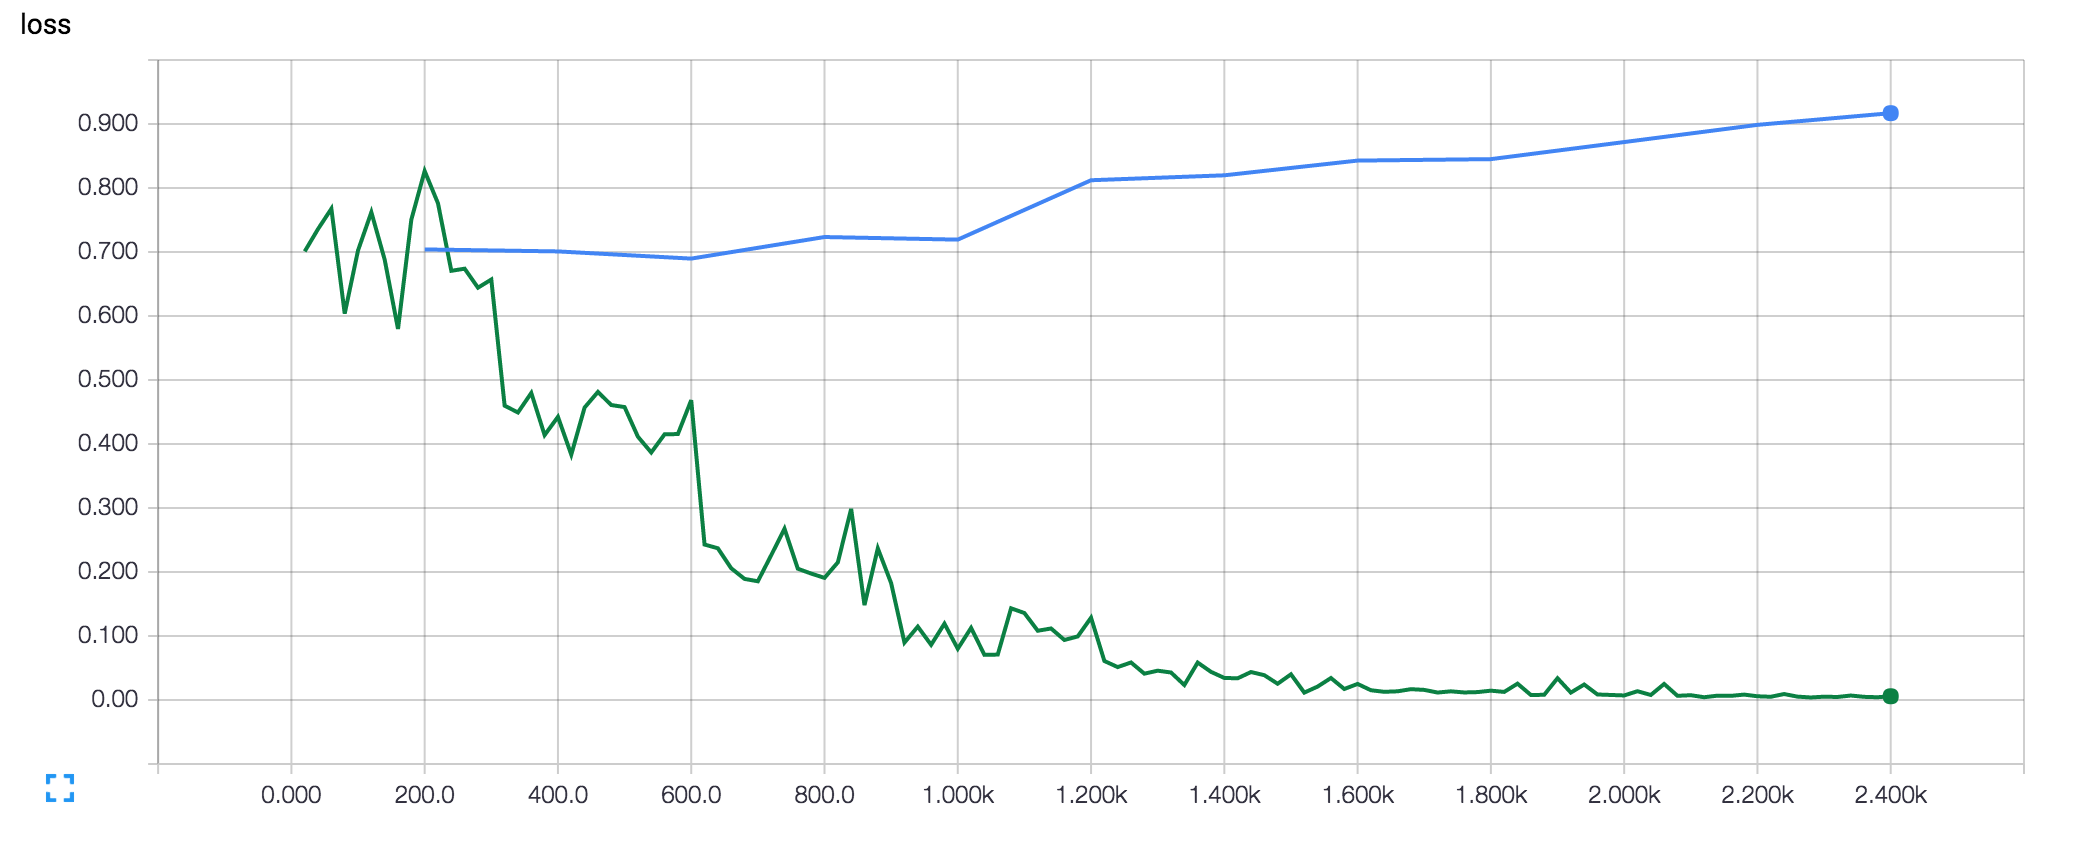

In [3]:
Image(filename='/Users/pinesol/nlp/hw1/two-layer-loss.png') 

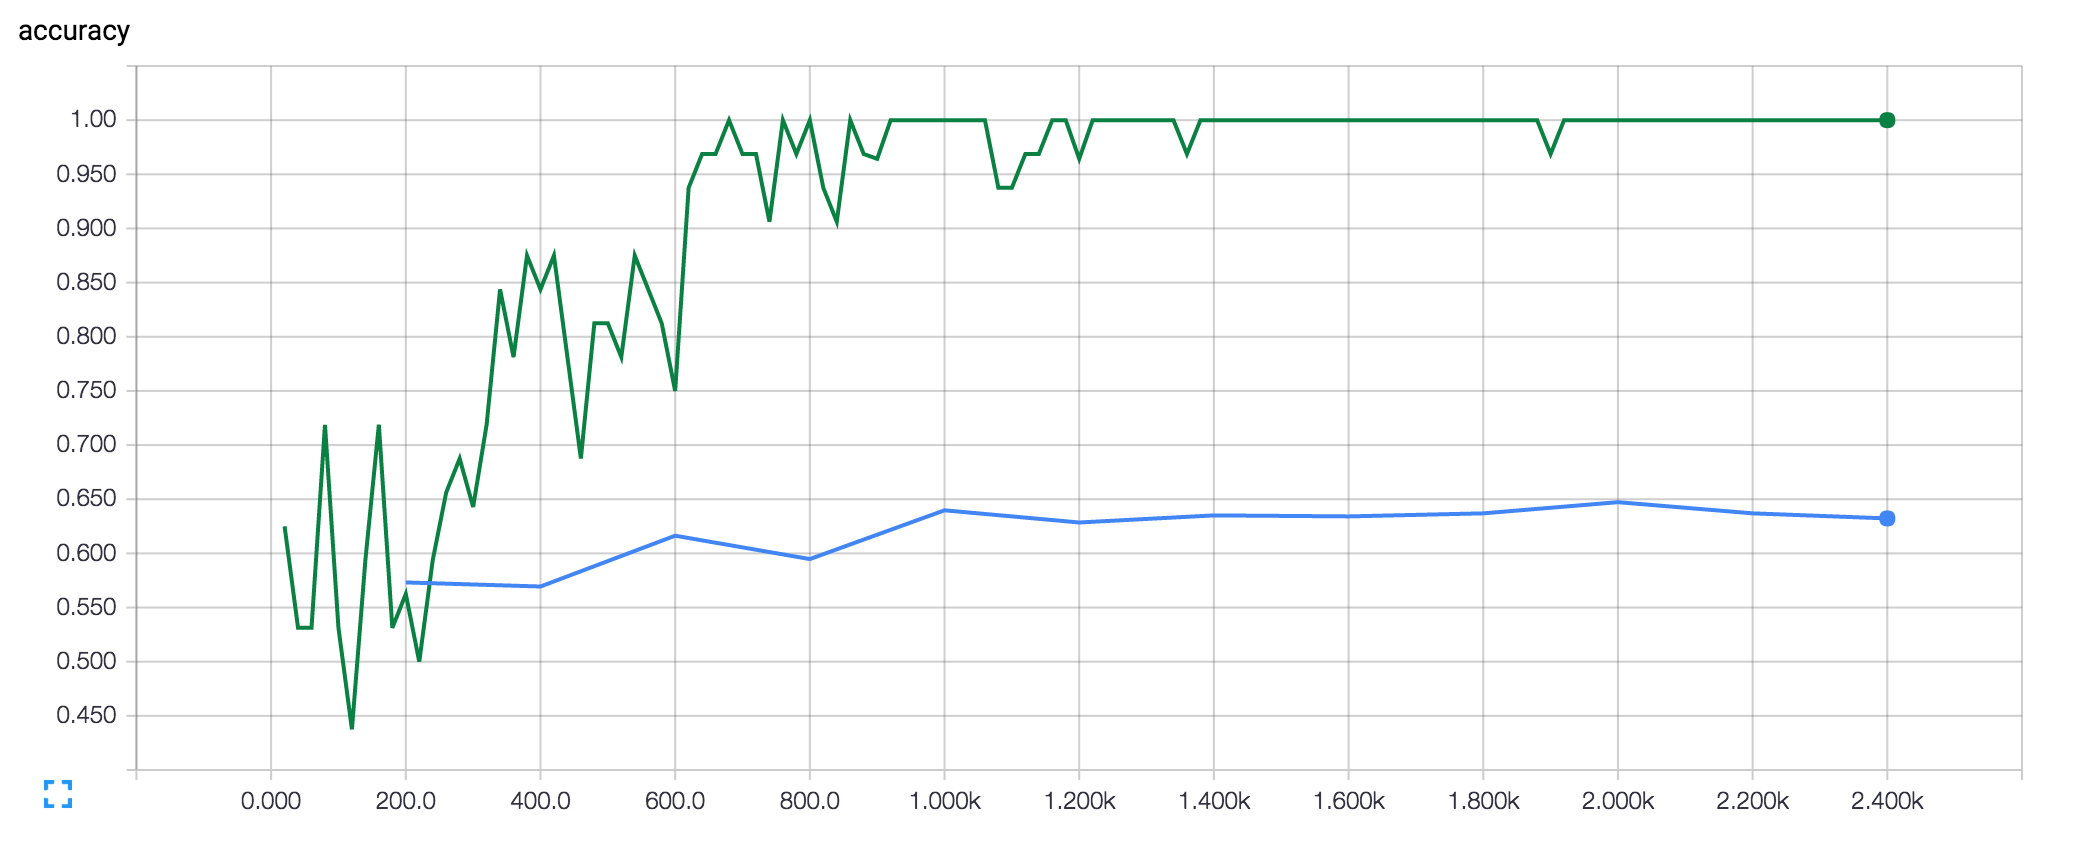

In [4]:
Image(filename='/Users/pinesol/nlp/hw1/two-layer-accuracy.png') 